In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # increase dpi of the pics

In [3]:
plt.style.use('seaborn')

In [4]:
firsts = pd.read_csv('BI-Intern first_purchases.csv',
                   parse_dates=['User First Purchase Month'],
                   dayfirst=True, # Dates are in the format: D.M.YYYY (1.8.2020)
                   infer_datetime_format=True)
firsts.head()

,User First Purchase Month,First Purchase Product Line,User ID,Purchase ID,Venue ID
0,2020-05-01,Restaurant,57b48aece14f6d64522f8c5f,5ec6b23c96741b6db6266639,5d7a32a73b546fccd88a05e9
1,2020-05-01,Restaurant,59f4803cdf196473b7fc124d,5ec6be1e712a4248e67d2bf0,5cd16542c7420059cc10b792
2,2020-05-01,Restaurant,5a427fbbea63d5000aff0ade,5ec7f07674bbff7edcb5be0d,5e7bce9ae360062306b4a233
3,2020-05-01,Restaurant,5a8c70b58fac51000b2ca9d8,5eac48651db7a19612824809,5e6ce90a7455f89bbb00be37
4,2020-05-01,Restaurant,5a9efa9bab3442000c2ba457,5eca9ed670a4dafe5de07698,5ea18277857aaa1b337ee201


In [5]:
firsts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71257 entries, 0 to 71256
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   User First Purchase Month    71257 non-null  datetime64[ns]
 1   First Purchase Product Line  71257 non-null  object        
 2   User ID                      71257 non-null  object        
 3   Purchase ID                  71257 non-null  object        
 4   Venue ID                     71257 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 2.7+ MB


In [6]:
firsts.describe(exclude=['datetime']).transpose()

,count,unique,top,freq
First Purchase Product Line,71257,2,Restaurant,70822
User ID,71257,71257,5f0aedc4df88112fa2a1f827,1
Purchase ID,71257,71257,5eb68bb00254d76433bd6001,1
Venue ID,71257,1407,5e7dc5c6d12956517345e7d0,1351


In [7]:
purchases = pd.read_csv('BI-Intern purchases.csv',
                   parse_dates=['Purchases Time Delivered'],
                   dayfirst=True,
                   infer_datetime_format=True)

purchases.head()

,Purchases Time Delivered,Product line,User ID,Purchase ID,Venue ID
0,2020-08-01,Restaurant,55080d6585f6661a3b37f7a5,5f3d81ef6cce0eeb05225f98,5e8b2c8be050b99f26647804
1,2020-08-01,Restaurant,55080d6585f6661a3b37f7a5,5f3c11f5a90667e766b04c19,5e8b2c8be050b99f26647804
2,2020-07-01,Retail store,556202537f84a43ac29ec7cb,5f0aec594c3cbeb4049ea36a,5ec2ab4401f812138e435c89
3,2020-07-01,Retail store,556202537f84a43ac29ec7cb,5f184a3c88046da058c5ed1d,5ec2ab4401f812138e435c89
4,2020-05-01,Restaurant,57b48aece14f6d64522f8c5f,5ecf98f34d3d68dc996dad7a,5cb4425ae93cce000d20612f


In [8]:
purchases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298714 entries, 0 to 298713
Data columns (total 5 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Purchases Time Delivered  298714 non-null  datetime64[ns]
 1   Product line              298714 non-null  object        
 2   User ID                   298714 non-null  object        
 3   Purchase ID               298714 non-null  object        
 4   Venue ID                  298714 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 11.4+ MB


In [9]:
purchases.describe(exclude=['datetime']).transpose()

,count,unique,top,freq
Product line,298714,2,Restaurant,287921
User ID,298714,74568,5ec04f84d2868704abb52f98,205
Purchase ID,298714,298714,5eb68bb00254d76433bd6001,1
Venue ID,298714,1503,5e77a370fee9ef1ba62d6454,4602


In [10]:
firsts['month_normalized'] = firsts['User First Purchase Month'].dt.to_period('M')
purchases['month_normalized'] = purchases['Purchases Time Delivered'].dt.to_period('M')

In [11]:
firsts_filtered = firsts[firsts['First Purchase Product Line'] == 'Restaurant']

In [12]:
purchases_filtered = purchases[purchases['User ID'].isin(firsts_filtered['User ID'])]

In [13]:
purchases_filtered = purchases_filtered[purchases_filtered['Product line'] == 'Restaurant']

In [14]:
purchases_filtered.describe(exclude=['datetime']).transpose()

,count,unique,top,freq
Product line,283750,1,Restaurant,283750
User ID,283750,70822,5ec04f84d2868704abb52f98,204
Purchase ID,283750,283750,5eb68bb00254d76433bd6001,1
Venue ID,283750,1445,5e77a370fee9ef1ba62d6454,4571
month_normalized,283750,6,2020-09,76935


In [15]:
# Attach first purchase month to purchases as "month_normalized_cohort" column
purchases_filtered = pd.merge(purchases_filtered, firsts_filtered[['User ID', 'month_normalized']], on='User ID', how="left", suffixes=('', '_cohort'))

In [16]:
purchases_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283750 entries, 0 to 283749
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Purchases Time Delivered  283750 non-null  datetime64[ns]
 1   Product line              283750 non-null  object        
 2   User ID                   283750 non-null  object        
 3   Purchase ID               283750 non-null  object        
 4   Venue ID                  283750 non-null  object        
 5   month_normalized          283750 non-null  period[M]     
 6   month_normalized_cohort   283750 non-null  period[M]     
dtypes: datetime64[ns](1), object(4), period[M](2)
memory usage: 17.3+ MB


In [17]:
purchases_filtered.describe(exclude=['datetime']).transpose()

,count,unique,top,freq
Product line,283750,1,Restaurant,283750
User ID,283750,70822,5ec04f84d2868704abb52f98,204
Purchase ID,283750,283750,5eb68bb00254d76433bd6001,1
Venue ID,283750,1445,5e77a370fee9ef1ba62d6454,4571
month_normalized,283750,6,2020-09,76935
month_normalized_cohort,283750,6,2020-05,101393


In [18]:
cohort = purchases_filtered.groupby(['month_normalized_cohort', 'month_normalized']) \
              .agg(n_customers=('User ID', 'nunique')) \
              .reset_index(drop=False)
# diff is number of months between since the first purchase (month_normalized - month_normalized_cohort)
# where month_normalized_cohort is the month of the first purchase
cohort['diff'] = (cohort.month_normalized-cohort.month_normalized_cohort).apply(lambda x: x.n)

In [19]:
pivot = cohort.pivot_table(index = 'month_normalized_cohort',
                                     columns = 'diff',
                                     values = 'n_customers')

In [20]:
pivot

diff,0,1,2,3,4,5
month_normalized_cohort,,,,,,
2020-05,16784.0,6047.0,4711.0,4431.0,4701.0,3406.0
2020-06,11236.0,3920.0,3346.0,3289.0,2283.0,NaN
2020-07,9063.0,3005.0,2701.0,1891.0,NaN,NaN
2020-08,9836.0,3397.0,2179.0,NaN,NaN,NaN
2020-09,16115.0,4599.0,NaN,NaN,NaN,NaN
2020-10,7788.0,NaN,NaN,NaN,NaN,NaN


In [21]:
# Devide each column by the zero-month-column to normalize data
first_month_customers = pivot.iloc[:,0]
retention_matrix = pivot.divide(first_month_customers, axis = 0)

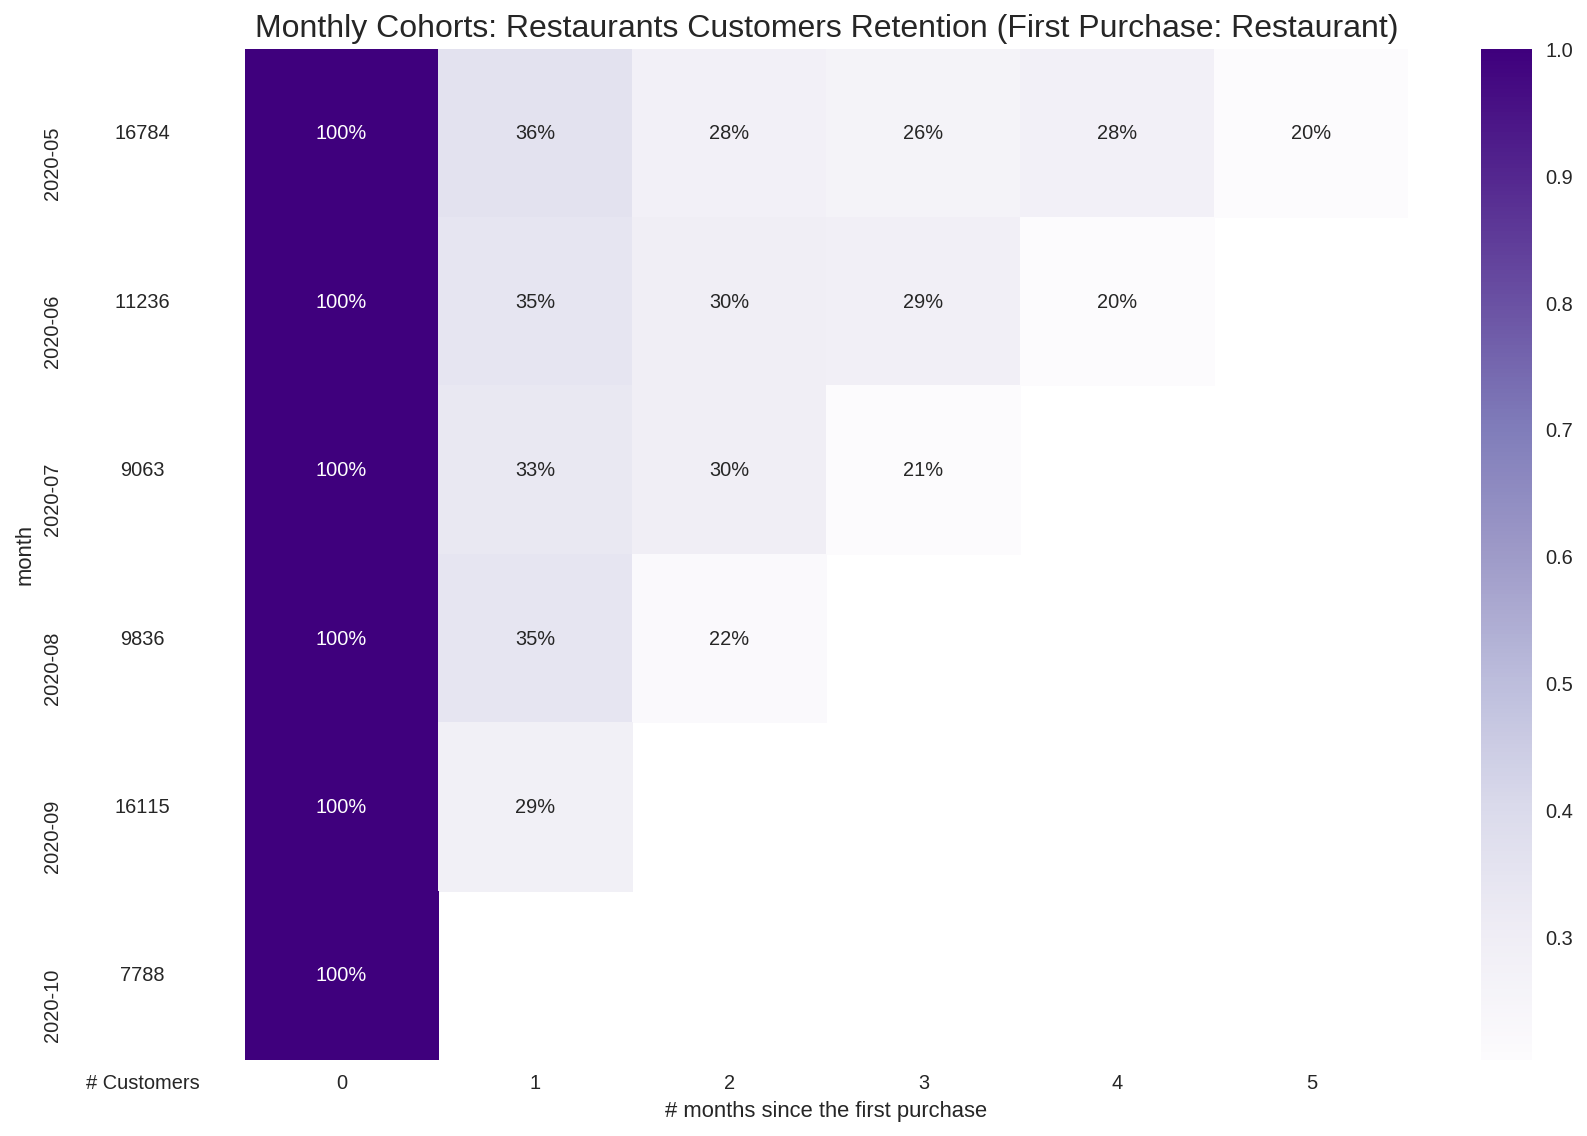

In [22]:
# plot the retention matrix
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})

    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='Purples',
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: Restaurants Customers Retention (First Purchase: Restaurant)', fontsize=16)
    ax[1].set(xlabel='# months since the first purchase',
              ylabel='')

    # cohort size    
    cohort_size_df = pd.DataFrame(first_month_customers).rename(columns={0: '# Customers'})
    cohort_size_df.index.rename('month', inplace=True)
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()
    fig.savefig('Restaurants Customers Retention (First Purchase: Restaurant).png', dpi=300)